# Prime number analysis

## Presentation of the algorithm generating prime numbers
A naive way to determine if a number `n` is prime would be to iteratively divide it by each of the numbers less than itself up to 2. If the number is divisible by any of them, then it is composite (not prime), if it is not divisible by any of them it is then prime. But this process, while it may be suitable for small numbers, has the disadvantage of being particularly cumbersome for large numbers. Indeed the amount of calculation required is always equal to `n-2`

One way to optimize the algorithm would be to use the primality theorem which states that **a number `n` is prime if it is not divisible by any number smaller than its square root**. The iterative process can thus be greatly reduced.

>If we decided to check the primality of the number 101 (which is indeed prime), the naive algorithm would require performing 99 operations (101-2), but using the primality theorem, `n` becomes equal to the square root of 101 is 10, so we only perform 8 operations (10-2) instead of 99, a saving of approximately 92% on calculation time.

### Function overview
The algorithm is divided into two functions:
- `is_prime` allowing you to check if a number is prime
- `prime_gen` returning a generator of an infinite sequence of prime numbers which can be iterated

#### `is_prime`
Allows you to check if a number `n` is prime using the primality theorem. In the function we raise `n` to a power of 0.5 because this amounts to calculating its square root, plus it saves us from importing modules such as `math` or `numpy`. So, the `for` loop goes through the values going from 2 to the square root of `n` and checks if `n` is divisible with at least one of them, if so the function returns False: `n` is not prime. If the function ends the sequence having failed to divide `n` with any of these values, then `n` is prime.

In [224]:
def is_prime(n):
    if n <= 1:
        return False
    for i in range(2, int(n**0.5) + 1):
        if n % i == 0:
            return False
    return True

#### `prime_gen`
This is a generating function, that is to say intended to become a generator. The function creates an infinite loop going through the numbers starting from 2 and checking, using the `is_prime` function, if each of them is prime. If this is the case, the value is returned with a `yield`. At the next requested element, the function resumes where it left off until the next `yield` encountered.

The generator can then be created by assigning this function to a variable, `primes` in our case.

In [225]:
def prime_gen():
    n = 2
    while True:
        if is_prime(n):
            yield n
        n += 1

In [226]:
# Generator creation
primes = prime_gen()

In [227]:
for _ in range(20):
    print(next(primes), end=" ")

2 3 5 7 11 13 17 19 23 29 31 37 41 43 47 53 59 61 67 71 

## Analysis

In [228]:
from statistics import mean

In [229]:
def average_dist(sample_length=10, sample_quantity=10, out_type="list"):
    gen = prime_gen()
    round_vals = 3
    L = [] # Temporary storage of sampled primes
    diffs = []
    stats = {}

    for _ in range(sample_quantity): # Number of samples
        for _ in range(sample_length): # Elements of each sample
            L.append(next(gen)) # Prime numbers generation
        
        # Calculating the difference between 
        # each pair of values in L and inserting 
        # the results into list D
        D = []
        for i in range(len(L) - 1):
            diff = round(L[i + 1] - L[i], round_vals)
            D.append(diff)
        
        diffs_mean = round(mean(D), round_vals) # Difference
        diffs.append(diffs_mean) # Mean calculation

        if out_type  == "dict":
            stats[f"{L[0]} to {L[-1]}"] = [(L[0], L[-1]), L, D, diffs_mean]

        L=[]

    if out_type == "list":
        return diffs
    if out_type == "dict":
        return stats

In [230]:
dict_stats = average_dist(sample_quantity=30, out_type="dict")

In [231]:
y_label = [val[3] for val in dict_stats.values()]

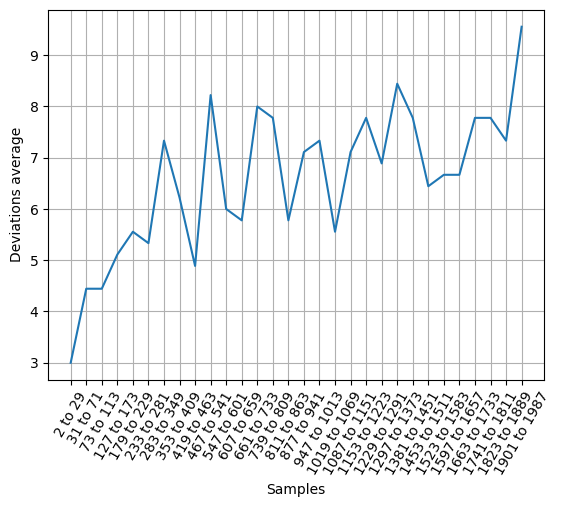

In [232]:
import matplotlib.pyplot as plt

x_label = [key for key in dict_stats.keys()]
x = list(range(len(x_label)))
y = y_label

plt.plot(x, y)
plt.xticks(x, x_label, rotation=60)
plt.xlabel("Samples")
plt.ylabel("Deviations average")
plt.grid(True)


plt.show()